In [ ]:
import pandas as pd
import io
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
uploaded = files.upload()

Saving crabs.csv to crabs.csv


In [ ]:
crabs_data = pd.read_csv('crabs.csv') # crabs_data is dataframe
#Rename the columns
crabs_data = crabs_data.rename(columns={'sp':'species','FL':'Frontal lobe', 'RW':'Rear Width','CL':'Carapace Midline', 'CW':'Maximum Width','BD':'Body depth'})
#Rename the items from columns species/sex
crabs_data['species'] = crabs_data['species'].map({'B':'Blue','O':'Orange'})
crabs_data['sex'] = crabs_data['sex'].map({'M':'Male','F':'Female'})

In [ ]:
crabs_data.describe()

,index,Frontal lobe,Rear Width,Carapace Midline,Maximum Width,Body depth
count,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000
mean,25.500000,15.583000,12.73850,32.105500,36.414500,14.030500
std,14.467083,3.495325,2.57334,7.118983,7.871955,3.424772
min,1.000000,7.200000,6.50000,14.700000,17.100000,6.100000
25%,13.000000,12.900000,11.00000,27.275000,31.500000,11.400000
50%,25.500000,15.550000,12.80000,32.100000,36.800000,13.900000
75%,38.000000,18.050000,14.30000,37.225000,42.000000,16.600000
max,50.000000,23.100000,20.20000,47.600000,54.600000,21.600000


In [ ]:
crabs_data['class'] = crabs_data.species + crabs_data.sex
data_columns = ['Frontal lobe','Rear Width','Carapace Midline','Maximum Width','Body depth']

In [ ]:
crabs_standardized = crabs_data.copy()
crabs_standardized[data_columns] = StandardScaler().fit_transform(crabs_data[data_columns])

In [ ]:
crabs_standardized.head()

,species,sex,index,Frontal lobe,Rear Width,Carapace Midline,Maximum Width,Body depth,class,FDA1,FDA2
0,Blue,Male,1,-2.146232,-2.352450,-2.253926,-2.217772,-2.057989,BlueMale,1.538869,-0.808137
1,Blue,Male,2,-1.945462,-1.962875,-1.972282,-1.988538,-1.940899,BlueMale,1.637047,-0.370588
2,Blue,Male,3,-1.830736,-1.923917,-1.845543,-1.784775,-1.853083,BlueMale,2.802492,-0.249383
3,Blue,Male,4,-1.716010,-1.884960,-1.690638,-1.695629,-1.706721,BlueMale,2.295358,-1.029487
4,Blue,Male,5,-1.658647,-1.846002,-1.662474,-1.708364,-1.706721,BlueMale,1.732949,-1.119930


<Axes: xlabel='FDA1', ylabel='FDA2'>

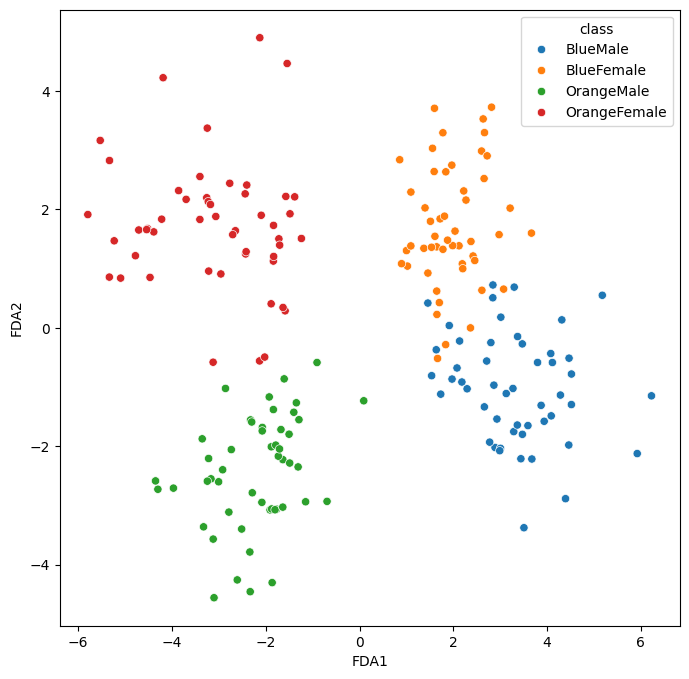

In [ ]:
lda_model = LinearDiscriminantAnalysis(n_components=2)
crabs_lda = lda_model.fit_transform(crabs_standardized[data_columns].values,y=crabs_standardized['class'])
crabs_standardized[['FDA1','FDA2']] = crabs_lda

fig = plt.figure(figsize=(8,8))
sns.scatterplot(x='FDA1', y='FDA2', hue='class', data=crabs_standardized)